# Imports
This notebook uses data available to FIREMAN members on [LUT sharepoint](https://lut.sharepoint.com/:f:/r/sites/o365fireman/Shared%20Documents/Colab_PowerElectronicConverter/PEC_datasets/New%20Data?csf=1&web=1&e=JINTw3)

In [1]:
import sys
import pandas as pd
# to save results to data directory
module_path = '..'
if module_path not in sys.path:
    sys.path.insert(0, module_path)
# increase displayed columns in jupyter notebook
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)

In [2]:
import os
import scipy.io
import json
import numpy as np
import matplotlib.pyplot as plt
import src.common as common

# increase displayed columns in jupyter notebook
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)

# temporarily remove deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Dataset

**identifiers**

In [3]:
column_types = common.json_load("#datasets/Colab_PowerConverter/column_types.json")

identifier = column_types["identifier"]
target = column_types["target"]
datasets = column_types["datasets"]
feature_ids = column_types["feature_ids"]

**agregate data from matlab files**

In [4]:
data_df_final = pd.DataFrame(columns = list(feature_ids.keys()).extend(["fault_id", "fault"]))

for dataset in datasets.keys():
    data_raw_dict = {}
    data_raw = scipy.io.loadmat("#datasets/Colab_PowerConverter/" + dataset + "/in.mat")
    in_len = len(data_raw["in"])
    for feature in feature_ids.keys():
        data_raw_dict.update({feature: data_raw[feature_ids[feature][0]][:in_len,feature_ids[feature][1]]})
    data_raw_dict.update({"label": [dataset]*in_len})
    data_df = pd.DataFrame(data_raw_dict)
    data_df["fault"] = 0
    if len(datasets[dataset]["failure"][0])==1:
        data_df.loc[datasets[dataset]["failure"][0][0]:, "fault"] = 1
    if len(datasets[dataset]["failure"][0])==2:
        data_df.loc[datasets[dataset]["failure"][0][0]:datasets[dataset]["failure"][0][1], "fault"] = 1
    data_df.drop(data_df.index[datasets[dataset]["drop"][0][0]:datasets[dataset]["drop"][0][1]], inplace=True)
    data_df_final = pd.concat([data_df_final, data_df], ignore_index=True)
data_df_final[identifier] = data_df_final.index

/Users/abeattie/miniconda/envs/FIREMAN-project/lib/python3.7/site-packages/scipy/io/matlab/mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


**save to pickle for further use**

In [5]:
data_df_final.to_pickle("#datasets/Colab_PowerConverter/dataset.pkl")

## Simple display of the dataset

In [6]:
data_df_final.head()

,f_c,P,m_d,m_q,theta,P_ref,V_DC,V_phaseA,V_phaseB,V_phaseC,I_phaseA,I_phaseB,I_phaseC,label,fault,sample_id
0,0.160401,102708.459241,311.0,0.0,-163.738242,2500.0,800.0,-259.299072,-19.057368,278.356440,294.335345,-928.391542,634.056197,Damping-320,0,0
1,0.267618,102492.887801,311.0,0.0,-163.738192,2500.0,800.0,-259.696384,-18.337809,278.034193,284.639238,-916.942492,632.303254,Damping-320,0,1
2,0.369417,102288.207648,311.0,0.0,-163.738108,2500.0,800.0,-260.114450,-17.577815,277.692264,274.799672,-905.428051,630.628379,Damping-320,0,2
3,0.465867,102094.284312,311.0,0.0,-163.737992,2500.0,800.0,-260.553771,-16.775993,277.329764,264.816484,-893.849302,629.032819,Damping-320,0,3
4,0.557028,101910.993770,311.0,0.0,-163.737845,2500.0,800.0,-261.014849,-15.930912,276.945761,254.689537,-882.207299,627.517762,Damping-320,0,4


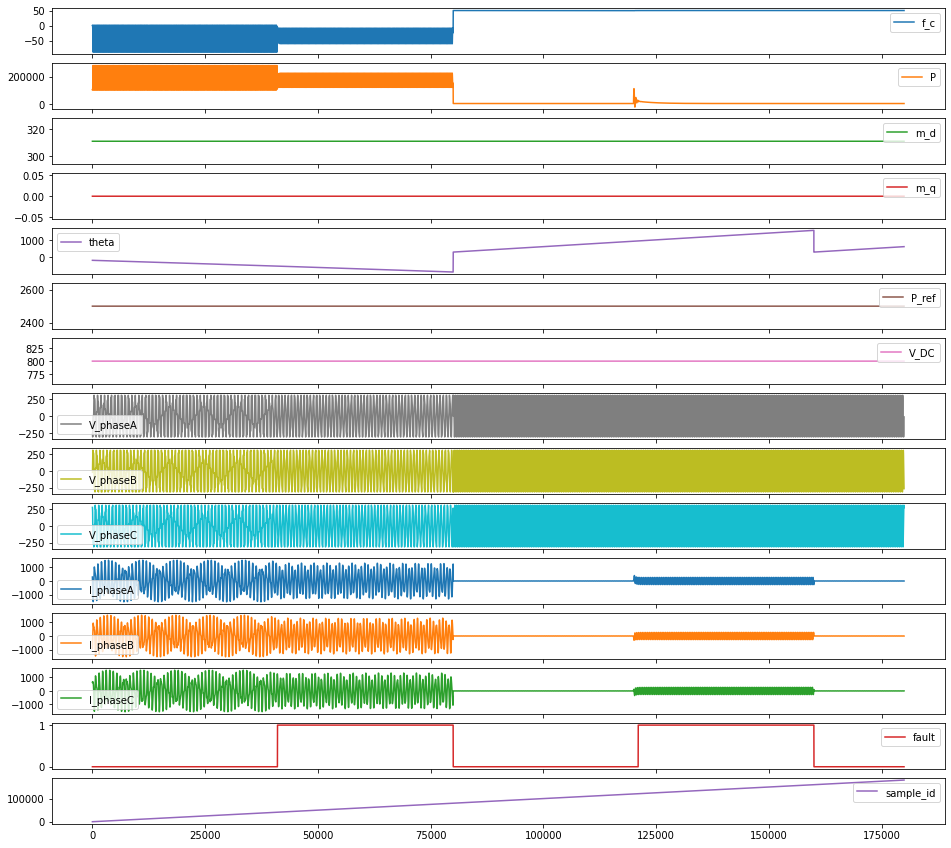

In [7]:
data_df_final[:180000].plot(subplots=True, figsize=(16,15));